In [1]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/home/qyli/oPDF2')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
def unify_data(inputdata, untype = 'MM'):
    dmin = np.min(inputdata, axis = 0)
    dmax = np.max(inputdata, axis = 0)
    
    if untype == 'MM':
        return (inputdata - dmin) / (dmax - dmin)

In [3]:
fileCM = '../proxy/cluster/G3X-CM-masscomplete-ALL.txt'
filefit = '../proxy/cluster/GXsub_DM_fitmc_rcin200_100000_TMP.txt'
dataCM = np.loadtxt(fileCM)
datafit = np.loadtxt(filefit)
import oPDFplus as opd
mmtrue = datafit[:,0] / dataCM[:,2] * 1e15
cctrue = datafit[:,1] / dataCM[:,6]
loc = opd.sigma3sel(np.log10(mmtrue),np.log10(cctrue))

318
312
311
310
310


In [4]:
target = np.loadtxt('../proxy/cluster/GXsub_DM_InL_rcin200_100000_TMP.txt')[loc]
target = unify_data(target)

maind = np.loadtxt('../proxy/GadgetX_DS_main')

JeansE = np.loadtxt('../proxy/JeansE_DM_lnL_rcin200_n100000_bin20_boot200')[loc]
JeansE = unify_data(JeansE)

#select feathers
mar = maind[:,6]
maind[mar<0,6] = np.min(mar[mar>0])
maind[:,6] = np.log10(maind[:,6]) #make mar to be log
maind = maind[loc,1:]
maind = unify_data(maind)

fbest = np.append(maind, JeansE.reshape(310,1), axis = 1)
print(fbest.shape)

(310, 28)


<IPython.core.display.Javascript object>


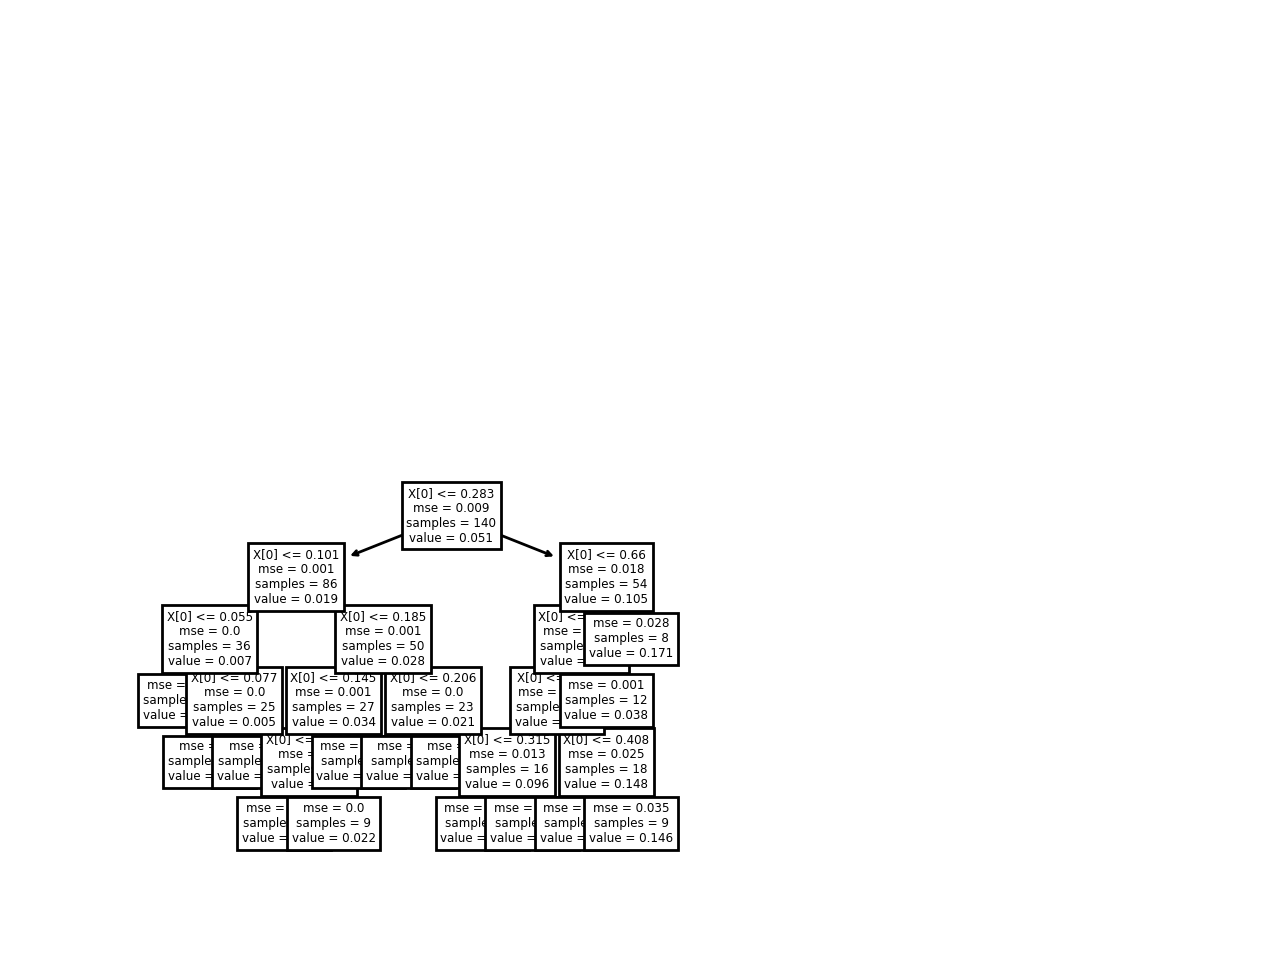

oob score with all features 0.05368785643777885


In [13]:
#test oob score error for each tree and for random forest
from sklearn.metrics import r2_score
from sklearn.ensemble._forest import _generate_unsampled_indices
import sklearn.tree as sktree

x_train,x_test,y_train,y_test = train_test_split(maind[:,1].reshape(310,1), target, test_size=0.3, random_state=1)
forest = RandomForestRegressor(n_estimators=400,  min_samples_leaf = 8, random_state=0,  oob_score = True)
forest.fit(x_train, y_train)

n_samples = x_train.shape[0]
predictions = np.zeros((n_samples))
n_predictions = np.zeros((n_samples))

from sklearn import tree
for trees in forest.estimators_:
    tree.plot_tree(trees)
#     # Here at each iteration we obtain out of bag samples for every tree.
#     unsampled_indices =_generate_unsampled_indices(tree.random_state,n_samples,n_samples)
#     unsampleX=x_train[unsampled_indices,:]
#     unsampley=y_train[unsampled_indices]
#     print(tree.decision_path(x_train))
    
#     predictions[unsampled_indices] += tree.predict(unsampleX)
#     n_predictions[unsampled_indices] += 1
#     sktree.plot_tree(tree)
    plt.savefig('./trees.pdf')
    break

# score3 = 0
# predictions /= n_predictions
# score3 = r2_score(y_train, predictions)

# print(score3)
print('oob score with all features', forest.oob_score_)

In [ ]:
X_train = X_train.values

sample_id = 0

for j, tree in enumerate(rf.estimators_):

    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    print("Decision path for DecisionTree {0}".format(j))
    node_indicator = tree.decision_path(X_train)
    leave_id = tree.apply(X_train)
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('Rules used to predict sample %s: ' % sample_id)
    for node_id in node_index:
        if leave_id[sample_id] != node_id:
            continue

        if (X_train[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("decision id node %s : (X_train[%s, %s] (= %s) %s %s)"
              % (node_id,
                 sample_id,
                 feature[node_id],
                 X_train[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))